In [1]:
# Import necessary libraries
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

c:\New folder (2)\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   Unnamed: 0                                           Question  \
0           0  What are the three components of a well-posed ...   
1           1  What are the main steps in designing a learnin...   
2           2  What is the role of the training experience in...   
3           3  Why is the target function important in a lear...   
4           4      What are some key issues in machine learning?   

                                              Answer  \
0  1. The task: What is being learned? 2. The per...   
1  1. Choosing the training experience. 2. Choosi...   
2  The training experience provides the data or i...   
3  The target function defines what the system ai...   
4  1. How to represent data. 2. Overfitting and u...   

                                Reference  
0        1.1 Well-Posed Learning Problems  
1         1.2 Designing a Learning System  
2  1.2.1 Choosing the Training Experience  
3      1.2.2 Choosing the Target Function  
4        1.3.1 Issues in Machine L

Batches: 100%|██████████| 6/6 [00:01<00:00,  5.94it/s]
c:\New folder (2)\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                            Question  Cluster
0  What are the three components of a well-posed ...        2
1  What are the main steps in designing a learnin...        2
2  What is the role of the training experience in...        2
3  Why is the target function important in a lear...        2
4      What are some key issues in machine learning?        4


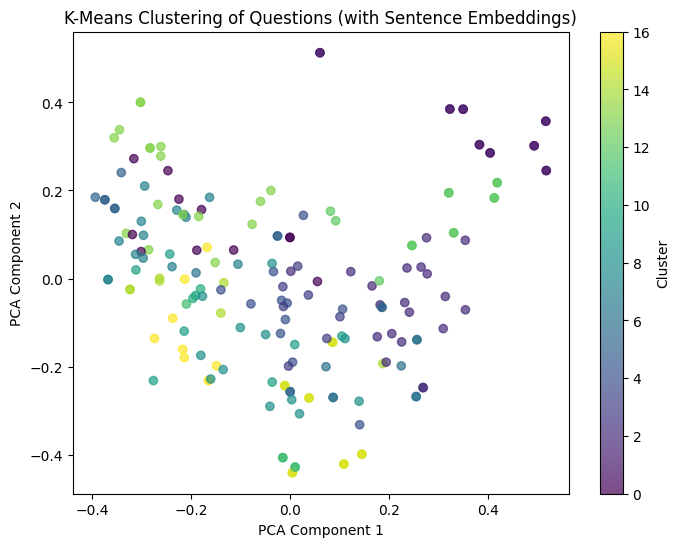

Cluster Centers (in original embedding space):
[[-0.05480621  0.00031141  0.03029512 ...  0.00792512  0.00512903
   0.01445297]
 [-0.04416857  0.01174858 -0.01604959 ...  0.05696819  0.03596119
   0.03959843]
 [ 0.01633233 -0.00274222 -0.01919227 ...  0.06382589  0.03979538
   0.0227791 ]
 ...
 [-0.01185667  0.00115122  0.06159687 ...  0.00446727  0.03997846
   0.00562221]
 [-0.00041538  0.02484293  0.02758906 ... -0.05247821  0.03150709
   0.07653722]
 [-0.00381713 -0.01641624  0.00501586 ...  0.05032001  0.04566498
  -0.04975825]]

Cluster 0:
8                 What is the FIND-S algorithm used for?
97     What is the Expectation-Maximization (EM) algo...
98     How is the EM algorithm used to estimate means...
108    What is the mistake bound for the FIND-S algor...
111          What is k-nearest neighbor (k-NN) learning?
Name: Question, dtype: object

Cluster 1:
158                                  What is Q-learning?
159                              What is the Q-function?
160     

In [11]:


# Load the CSV data
# Replace 'your_data.csv' with the path to your CSV file
df = pd.read_csv('dataSet.csv')

# Display the first few rows of the data to understand its structure
print(df.head())

# Initialize Sentence-BERT model for sentence embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')  # You can use other models as well

# Convert questions into sentence embeddings (dense vector representation)
# Assuming 'questions' is the column containing the questions
embeddings = model.encode(df['Question'].tolist(), show_progress_bar=True)

# Apply K-Means clustering
num_clusters = 17  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(embeddings)

# Display the resulting clusters in the DataFrame
print(df[['Question', 'Cluster']].head())

# Reduce dimensionality for visualization (using PCA)
pca = PCA(n_components=2)  # Reduce to 2D for visualization
reduced_embeddings = pca.fit_transform(embeddings)

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering of Questions (with Sentence Embeddings)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Optionally, print out the cluster centers
print("Cluster Centers (in original embedding space):")
print(kmeans.cluster_centers_)

# You can also inspect the questions in each cluster
for i in range(num_clusters):
    print(f"\nCluster {i}:")
    print(df[df['Cluster'] == i]['Question'].head())  # Show top 5 questions in each cluster
